---
title: "Sharpen image using unsharp mask"
description: "In this tutorial we are going to learn how to use the unsharp mask"
author:
    - "Edgar Riba"
date: 05-30-2021
categories:
    - Basic
    - Filters
    - kornia.filters
image: "../tutorials/assets/unsharp_mask.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/unsharp_mask.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

We first install kornia

In [ ]:
%%capture
%matplotlib inline
!pip install kornia
!pip install kornia-rs

In [ ]:
import kornia
import matplotlib.pyplot as plt

kornia.__version__

'0.6.12'

Downloading the example image.

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/squirrel.jpg"
download_image(url)

'squirrel.jpg'

In [ ]:
# Read the image with Kornia
data = kornia.io.load_image("squirrel.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]  # BxCxHxW

We create Unsharp Mask filter object and apply it to data. The unsharp mask filter is initialized with the format `kornia.filters.UnsharpMask(kernel_size, sigma)`. You can tune these parametres and experiment!

In [ ]:
sharpen = kornia.filters.UnsharpMask((9, 9), (2.5, 2.5))
sharpened_tensor = sharpen(data)
difference = (sharpened_tensor - data).abs()

In [ ]:
# Converting the sharpened tensor to image
sharpened_image = kornia.utils.tensor_to_image(sharpened_tensor)
difference_image = kornia.utils.tensor_to_image(difference)

So, let us understand how we arrived till here.

1. In the unsharp mask technique, first a gaussian blur is applied to the data.
2. Then the blur is subtracted from the orignal data.
3. The resultant is added to the origanl data.
4. So, what do we get? Sharpened data!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


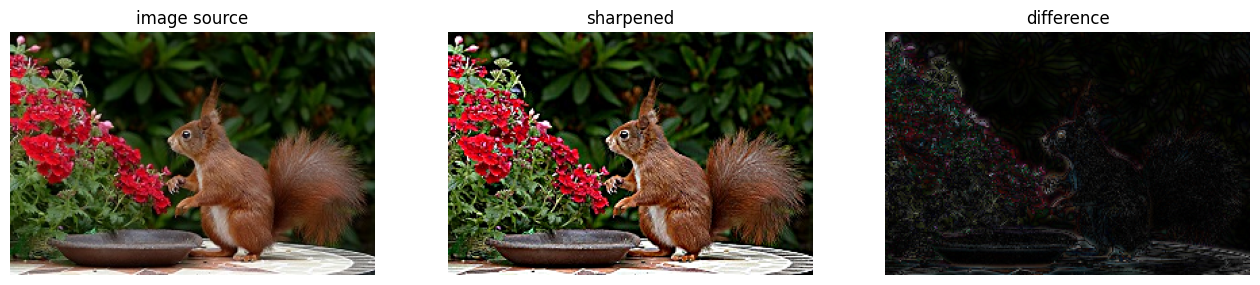

In [ ]:
# To display the input image, sharpened image and the difference image
fig, axs = plt.subplots(1, 3, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis("off")
axs[0].set_title("image source")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title("sharpened")
axs[1].imshow(sharpened_image)

axs[2].axis("off")
axs[2].set_title("difference")
axs[2].imshow(difference_image)
plt.show()